In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
from plotly.offline import init_notebook_mode, plot
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)
%matplotlib inline

### Explore data head and shape

In [4]:
# import data
bechdel = pd.read_csv("../data/clean/bechdel_clean.csv")
crew = pd.read_csv("../data/clean/crew_clean.csv")
cast = pd.read_csv("../data/clean/cast_clean.csv")

In [5]:
# look at data
bechdel.head()

,Unnamed: 0,tconst,id,title,bechdel_rating,year,averageRating,numVotes,runtimeMinutes,genres,primaryTitle
0,3,3.0,5433,Pauvre Pierrot,0,1892,6.6,947.0,4,"Animation,Comedy,Romance",Pauvre Pierrot
1,4,12.0,6199,"Arrival of a Train, The",0,1896,7.4,8160.0,1,"Documentary,Short",The Arrival of a Train
2,5,14.0,5444,Tables Turned on the Gardener,0,1895,7.2,3564.0,1,"Comedy,Short",Tables Turned on the Gardener
3,6,91.0,4982,"House of the Devil, The",0,1896,6.7,2023.0,3,"Horror,Short",The House of the Devil
4,7,131.0,5406,Une nuit terrible,0,1896,5.9,768.0,1,"Comedy,Horror,Short",A Terrible Night


In [6]:
# cheack data shape
bechdel.shape

(7653, 11)

In [7]:
# look at crew data
crew.head()

,Unnamed: 0,nconst,tconst,crew.type,primaryName,primaryProfession,gender
0,107,nm0000005,77711,writer,Ingmar Bergman,"writer,director,actor",Male
1,108,nm0000005,36914,writer,Ingmar Bergman,"writer,director,actor",Male
2,109,nm0000005,76319,writer,Ingmar Bergman,"writer,director,actor",Male
3,110,nm0000005,53976,director,Ingmar Bergman,"writer,director,actor",Male
4,111,nm0000005,55499,writer,Ingmar Bergman,"writer,director,actor",Male


In [11]:
# check how many null values there are for gender in crew data 
crew.gender.isnull().sum()

18966

In [13]:
# look at cast data
cast.head()

,Unnamed: 0,nconst,tconst,ordering,category,primaryName,primaryProfession,gender
0,60,nm0000001,29971.0,1.0,actor,Fred Astaire,"soundtrack,actor,miscellaneous",Male
1,61,nm0000001,29546.0,1.0,actor,Fred Astaire,"soundtrack,actor,miscellaneous",Male
2,62,nm0000001,36363.0,1.0,actor,Fred Astaire,"soundtrack,actor,miscellaneous",Male
3,63,nm0000001,41158.0,1.0,actor,Fred Astaire,"soundtrack,actor,miscellaneous",Male
4,64,nm0000001,40308.0,2.0,actor,Fred Astaire,"soundtrack,actor,miscellaneous",Male


In [15]:
# check how many null values there are for gender in cast data 
cast.gender.isnull().sum()

16802

### Ratings by 5 year groups

This code groups data into 5 year buckets and plots pass rate over time as bar charts. We did not use chart in the final website.

In [8]:
# create dataframes by bechdel ratings
rating_0 = bechdel[bechdel['bechdel_rating'] == 0]
rating_1 = bechdel[bechdel['bechdel_rating'] == 1]
rating_2 = bechdel[bechdel['bechdel_rating'] == 2]
rating_3 = bechdel[bechdel['bechdel_rating'] == 3]

In [9]:
# group by year and count 
rating_0_cnt = pd.DataFrame(rating_0.groupby(['year']).size())
rating_0_cnt = rating_0_cnt.reset_index()
rating_0_cnt.columns = ['year', 'cnt']

rating_1_cnt = pd.DataFrame(rating_1.groupby(['year']).size())
rating_1_cnt = rating_1_cnt.reset_index()
rating_1_cnt.columns = ['year', 'cnt']

rating_2_cnt = pd.DataFrame(rating_2.groupby(['year']).size())
rating_2_cnt = rating_2_cnt.reset_index()
rating_2_cnt.columns = ['year', 'cnt']

rating_3_cnt = pd.DataFrame(rating_3.groupby(['year']).size())
rating_3_cnt = rating_3_cnt.reset_index()
rating_3_cnt.columns = ['year', 'cnt']

In [10]:
# get 5 year buckets
bechdel['5_year'] = (bechdel['year']//5)*5

In [11]:
# group movies by year and rating
ratings_by_year = pd.DataFrame(bechdel.groupby(['5_year', 'bechdel_rating']).size()).reset_index()
ratings_by_year.columns = ['5_year', 'bechdel_rating', 'num_movies']

num_movies_by_year = pd.DataFrame(bechdel.groupby(['5_year']).size()).reset_index()
num_movies_by_year.columns = ['5_year', 'tot_movies']

In [13]:
# get percent for use in plot
movies = pd.merge(ratings_by_year, num_movies_by_year, on='5_year', how='left')
movies['percent'] = movies['num_movies']/movies['tot_movies']

In [14]:
# split data for plotting
movies_pct_0 = movies[(movies['bechdel_rating'] == 0) & (movies['5_year'] > 1926) & (movies['5_year'] < 2018)]
movies_pct_1 = movies[(movies['bechdel_rating'] == 1) & (movies['5_year'] > 1926) & (movies['5_year'] < 2018)]
movies_pct_2 = movies[(movies['bechdel_rating'] == 2) & (movies['5_year'] > 1926) & (movies['5_year'] < 2018)]
movies_pct_3 = movies[(movies['bechdel_rating'] == 3) & (movies['5_year'] > 1926) & (movies['5_year'] < 2018)]

In [15]:
# Create traces
trace0 = go.Bar(
    x = movies_pct_0['5_year'],
    y = movies_pct_0.percent,
    name = '0 - Failed',
    marker=dict(
        color='rgb(183, 42, 42)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        ),
)
trace1 = go.Bar(
    x = movies_pct_1['5_year'],
    y = movies_pct_1.percent,
    name = '1 - Faied but has two women in it',
    marker=dict(
        color='rgb(219, 65, 65)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        ),
)
trace2 = go.Bar(
    x = movies_pct_2['5_year'],
    y = movies_pct_2.percent,
    name = '2 - Faied but has two women in it who talk to each other',
    marker=dict(
        color='rgb(242, 92, 92)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        ),
)
trace3 = go.Bar(
    x = movies_pct_3['5_year'],
    y = movies_pct_3.percent,
    name = '3 - Passed, has two women in it who talk to each other about something other than a man',
    marker=dict(
        color='rgb(95, 194, 204)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        ),
)
data = [trace3, trace2, trace1, trace0]
layout = go.Layout(title='Bechdel Pass Rate by Year', barmode='stack', 
                   titlefont=dict(size =18, family='Oswald, sans-serif'),
                   yaxis=dict(tickformat="%"), 
                   legend = dict(orientation = "h",xanchor = "center",x = 0.5))
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

#export html code
plotly.offline.plot(fig, filename='ratings_by_year.html', auto_open = False)

### Gender Plot

These plots take the top 15 most prolific actors and actresses and plots their pass rates in two bar charts

In [16]:
# only get data for actresses and actors and check value counts
actors = cast[cast.category.isin(['actor', 'actress'])]
actors.gender.value_counts()

Male      8958
Female    6034
Name: gender, dtype: int64

In [17]:
# check number unqiue actors
actors.nconst.nunique()

9102

In [25]:
# check number unqiue actors by gender
actors.nconst.groupby([actors.gender]).nunique()

gender
Female    3785
Male      5317
Name: nconst, dtype: int64

In [26]:
# check number unique movies
actors.tconst.nunique()

3679

In [19]:
# check number unique movies by gender
actors.tconst.groupby([actors.gender]).nunique()

gender
Female    3282
Male      3534
Name: tconst, dtype: int64

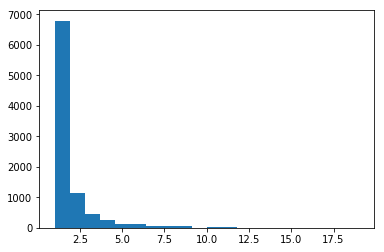

In [22]:
# plot histogram of how many movies each person is is
plt.hist(actors.groupby('nconst').size(), 20)
plt.show()

In [23]:
# get only rows where actors are in more than 10 movies
nummovies = pd.DataFrame(actors.groupby(['nconst','gender']).size().sort_values(ascending=False))
nummovies = nummovies.reset_index()
nummovies.columns = ['nconst', 'gender', 'tot_movie_cnt']
nummovies[nummovies.tot_movie_cnt > 10]['gender'].value_counts()

Male      39
Female    15
Name: gender, dtype: int64

In [24]:
# get top 15 actors and actresses by number of movies
topguys = nummovies[nummovies.gender == 'Male'].head(16)
topgals = nummovies[nummovies.gender == 'Female'].head(15)
topactors = pd.concat([topgals, topguys], ignore_index=True)

In [25]:
# merge to get name
topactorsdata = pd.merge(actors, topactors, on =['nconst'])
topactorsdata = topactorsdata[topactorsdata['primaryName'] != 'Georges Méliès']

In [26]:
# sort on number of movies
data = pd.merge(bechdel, topactorsdata, on =['tconst'])
data = data.sort_values(['tot_movie_cnt'], ascending=False)

In [27]:
# group by name and rating
data2 = data.groupby(['primaryName','gender_x','bechdel_rating','tot_movie_cnt']).size()
data2 = data2.reset_index()
data2.columns = ['name', 'gender', 'bechdel_rating', 'tot_movie_cnt', 'movie_cnt']

In [28]:
# split males and females data for plotting
guys = data2[data2.gender == 'Male']
guys = guys.sort_values(['tot_movie_cnt'], ascending=True)
gals = data2[data2.gender == 'Female']
gals = gals.sort_values(['tot_movie_cnt'], ascending=True)

In [29]:
# split rating for plotting
guys_0 = guys[(guys['bechdel_rating'] == 0)]
guys_1 = guys[(guys['bechdel_rating'] == 1)]
guys_2 = guys[(guys['bechdel_rating'] == 2)]
guys_3 = guys[(guys['bechdel_rating'] == 3)]

In [30]:
# add tractes and plot
trace0 = go.Bar(
    y=guys_0.name,
    x=guys_0.movie_cnt,
    name="0 - Failed, doesn't have two leading women in it",
    orientation = 'h',
    marker = dict(
        color='rgb(183, 42, 42)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
    
)
trace1 = go.Bar(
    y=guys_1.name,
    x=guys_1.movie_cnt,
    name = '1 - Failed, but has two women in it',
    orientation = 'h',
    marker = dict(
        color='rgb(219, 65, 65)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
)

trace2 = go.Bar(
    y=guys_2.name,
    x=guys_2.movie_cnt,
    name = '2 - Failed, but has two women in it who talk to each other',
    orientation = 'h',
    marker = dict(
        color='rgb(242, 92, 92)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
)

trace3 = go.Bar(
    y=guys_3.name,
    x=guys_3.movie_cnt,
    name = '3 - Passed, has two women in it who talk to each other about something other than a man',
    orientation = 'h',
    marker=dict(
        color='rgb(95, 194, 204)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        )
)

data = [trace3, trace2, trace1, trace0]
layout = go.Layout(title='Bechdel Pass Ratings of Movies Starred in by Top Actors', barmode='stack', 
                   titlefont=dict(size =18, family='Oswald, sans-serif'), 
                   legend = dict(orientation = "h",xanchor = "center",x = 0.5),
                  margin=go.Margin(l=150,pad=4))
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig) 

# export html
plotly.offline.plot(fig, filename='topactors.html', auto_open = False)

In [31]:
# split by rating for plotting
gals_0 = gals[(gals['bechdel_rating'] == 0)]
gals_1 = gals[(gals['bechdel_rating'] == 1)]
gals_2 = gals[(gals['bechdel_rating'] == 2)]
gals_3 = gals[(gals['bechdel_rating'] == 3)]

In [32]:
# add traces and plot
trace0 = go.Bar(
    y=gals_0.name,
    x=gals_0.movie_cnt,
    name='0 - Failed',
    orientation = 'h',
    marker = dict(
        color='rgb(183, 42, 42)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
    
)
trace1 = go.Bar(
    y=gals_1.name,
    x=gals_1.movie_cnt,
    name = '1 - Faied but has two women in it',
    orientation = 'h',
    marker = dict(
        color='rgb(219, 65, 65)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
)

trace2 = go.Bar(
    y=gals_2.name,
    x=gals_2.movie_cnt,
    name = '2 - Faied but has two women in it who talk to each other',
    orientation = 'h',
    marker = dict(
        color='rgb(242, 92, 92)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
    )
)

trace3 = go.Bar(
    y=gals_3.name,
    x=gals_3.movie_cnt,
    name = '3 - Passed, has two women in it who talk to each other about something other than a man',
    orientation = 'h',
    marker=dict(
        color='rgb(95, 194, 204)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        )
)

data = [trace3, trace2, trace1, trace0]
layout = go.Layout(title='Bechdel Pass Ratings of Movies Starred in by Top Actresses', barmode='stack', 
                   titlefont=dict(size =18, family='Oswald, sans-serif'), 
                   yaxis=dict(tickfont=dict(size=12
                                           ), showticklabels=True ),
                   showlegend=False,
                  margin=go.Margin(l=150,pad=4
    ))
fig = go.Figure(data=data, layout=layout)




plotly.offline.iplot(fig)

#export html
#plotly.offline.plot(fig, filename='top_actresses.html', auto_open = False)

'file:///Users/smcnish/classes/msan622/project/new/bechdel-test/code/top_actresses.html'

## Line Plot

This plot shows trend in pass/fail rate over time as a line chart.

In [33]:
# group data by rating and year
rating = bechdel[['bechdel_rating', 'year']]
rating = rating.groupby(['bechdel_rating', 'year']).size().reset_index(name='counts')

In [34]:
# get totals for plotting
cols = ['year', 'tconst']
df_sub = bechdel[cols]

totals = df_sub.groupby(['year'], as_index = False).size().reset_index(name='counts')
totals.columns = ['year', 'total']

In [35]:
# add totals to original data
joined = pd.merge(rating, totals, on = 'year', how = 'left')

In [36]:
# add percentage for plotting
joined['percent'] = joined['counts']/joined['total']

In [37]:
# split by rating
joined_0 = joined.loc[joined.bechdel_rating == 0]
joined_1 = joined.loc[joined.bechdel_rating == 1]
joined_2 = joined.loc[joined.bechdel_rating == 2]
joined_3 = joined.loc[joined.bechdel_rating == 3]

In [38]:
# name columns
cols = ['year', 'percent']

In [39]:
# get only column you want
joined_0 = joined_0[cols]
joined_1 = joined_1[cols]
joined_2 = joined_2[cols]
joined_3 = joined_3[cols]

In [40]:
# rename columns
joined_0.columns =['year', 'percent_0']
joined_1.columns =['year', 'percent_1']
joined_2.columns =['year', 'percent_2']
joined_3.columns =['year', 'percent_3']

In [41]:
# join everything back together
all1 = pd.merge(joined_0, joined_1, on = 'year', how = 'outer')
all2 = pd.merge(joined_2, joined_3, on = 'year', how = 'outer')
all_joined = pd.merge(all1, all2, on = 'year', how = 'outer')

In [42]:
# fill missing values with 0
all_joined = all_joined.fillna(0)

In [43]:
# stack and rename columns
all_joined['failed'] = all_joined['percent_0'] + all_joined['percent_1'] + all_joined['percent_2']
all_joined = all_joined.sort_values('year')
all_joined.columns = ['year', 'percent_0', 'percent_1', 'percent_2', 'passed', 'failed']

In [44]:
# clip years
all_joined2 = all_joined.loc[(all_joined.year >= 1940) & (all_joined.year < 2018)]

In [46]:
# Create a trace and plot
trace0 = go.Scatter(
    x = all_joined2['year'],
    y = all_joined2['passed'],
    name='Passed',
    fill='tonexty',
    marker = dict(
        color='rgb(95, 194, 204)',
        line = dict(
            color='rgb(73, 59, 59)',
            width = 1.5)
))
trace1 = go.Scatter(
    x = all_joined2['year'],
    y = all_joined2['passed'] + all_joined2['failed'],
    name='Failed',
    fill='tonexty',
        marker=dict(
        color='rgb(183, 42, 42)',
        line=dict(
            color='rgb(73, 59, 59)',
            width=1.5),
        )
)

data = [trace0, trace1]

layout = go.Layout(title='Bechdel Pass Rate by Year',
                   titlefont=dict(size =18, family='Oswald, sans-serif'),
                   yaxis=dict(tickformat="%", title='Pass Rate'), 
                   xaxis=dict(title='Year'))

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

#export html
plotly.offline.plot(fig, filename='line_chart_year.html', auto_open = False)

'file:///Users/smcnish/classes/msan622/project/new/bechdel-test/code/line_chart_year.html'

## Genre Plot

This plot looks at rating by genre in a 100 percent stacked bar chart.